In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
Sal_data= pd.read_csv("SalaryData_Test.csv")
Sal_data.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [4]:
Sal_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [5]:
Sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
age              15060 non-null int64
workclass        15060 non-null object
education        15060 non-null object
educationno      15060 non-null int64
maritalstatus    15060 non-null object
occupation       15060 non-null object
relationship     15060 non-null object
race             15060 non-null object
sex              15060 non-null object
capitalgain      15060 non-null int64
capitalloss      15060 non-null int64
hoursperweek     15060 non-null int64
native           15060 non-null object
Salary           15060 non-null object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
Sal_data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


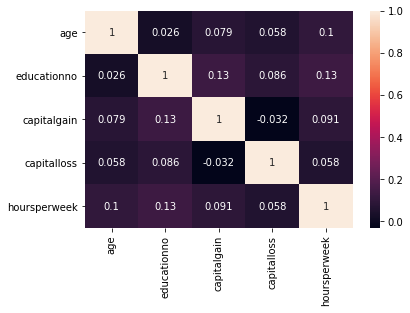

In [8]:
sns.heatmap(Sal_data.corr(),annot=True)

In [10]:
Sal_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
object_attrib = Sal_data.select_dtypes(include = ['object'])
object_attrib.columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [14]:
numeric_attrib = Sal_data.select_dtypes(include = ['int64'])
numeric_attrib.columns

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')

In [15]:
numeric_attrib.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000FE266F048>,
      dtype=object)

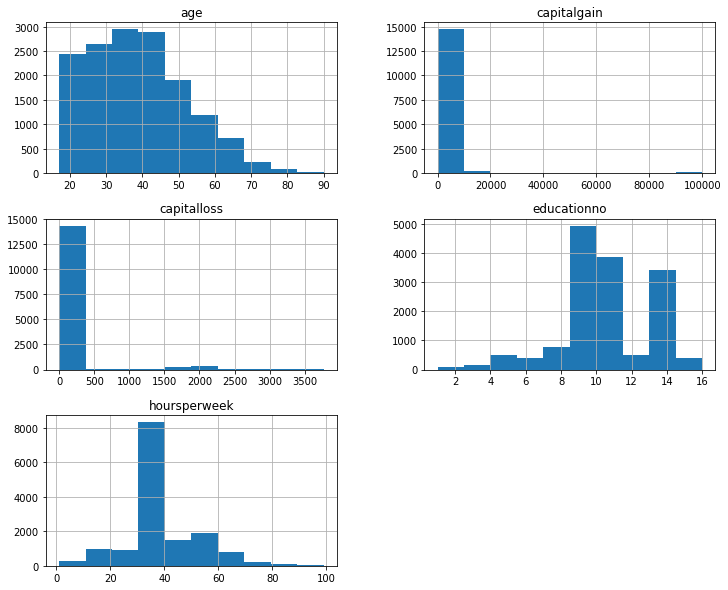

In [16]:
numeric_attrib.hist(figsize = (12,10))

In [19]:
# Use Label Encoder
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [23]:
Sal_data['workclass'] = le.fit_transform(Sal_data['workclass'])
Sal_data['education'] = le.fit_transform(Sal_data['education'])
Sal_data['maritalstatus'] = le.fit_transform(Sal_data['maritalstatus'])
Sal_data['occupation'] = le.fit_transform(Sal_data['occupation'])
Sal_data['relationship'] = le.fit_transform(Sal_data['relationship'])
Sal_data['race'] = le.fit_transform(Sal_data['race'])
Sal_data['sex'] = le.fit_transform(Sal_data['sex'])
Sal_data['native'] = le.fit_transform(Sal_data['native'])
Sal_data['Salary'] = le.fit_transform(Sal_data['Salary'])

In [24]:
Sal_data.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0


In [27]:
X = Sal_data.drop('Salary',axis=1)
X.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37


In [28]:
Y = Sal_data.iloc[:,-1]
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: Salary, dtype: int32

In [29]:
# Split into Train and Test
from sklearn.model_selection import train_test_split 

In [31]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size = 0.25,random_state = 0)

In [32]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [33]:
clf = GaussianNB()

In [34]:
clf = clf.fit(X_Train,Y_Train)

In [35]:
clf

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
Y_pread = clf.predict(X_Test)
Y_pread

array([0, 0, 0, ..., 0, 0, 1])

In [40]:
# Accuracy score
Conf_Mat = confusion_matrix(Y_Test, Y_pread)
Conf_Mat

array([[2677,  139],
       [ 638,  311]], dtype=int64)

In [42]:
acc = accuracy_score(Y_Test, Y_pread)*100
acc

79.36254980079681